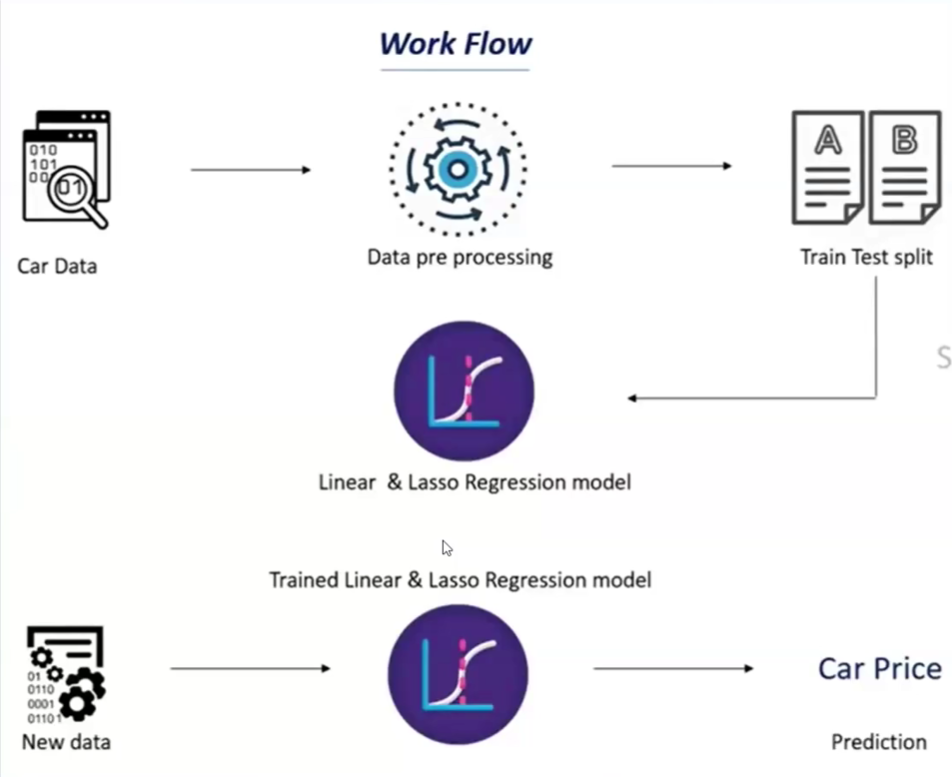

In [ ]:
#workflow of sci-kit learn
'''
1)setting up data
2)creating the model
3)Training/Testing the model
4)Prediction
'''

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Importing linear regression model
#to predict the value of y using x
from sklearn.linear_model import LinearRegression

In [ ]:
#importing accuracy score function
from sklearn import metrics

In [ ]:
#importing train test split function
from sklearn.model_selection import train_test_split

**Data collection and analysis**

In [ ]:
car_dataset=pd.read_csv('/content/Car data.csv')
car_dataset

,Car_Name,Seller_Type,Kms_Drive,Selling_Price,Present_Price,Year,Transmission,Fuel_Type,Owner
0,alfa-romero giulia,std,2548,5000,13495.0,2000,Manual,Petrol,0
1,alfa-romero stelvio,std,2548,5000,16500.0,2000,Manual,Petrol,0
2,alfa-romero Quadrifoglio,std,2823,5000,16500.0,2001,Manual,Petrol,0
3,audi 100 ls,std,2337,5500,13950.0,2002,Manual,Petrol,0
4,audi 100ls,std,2824,5500,17450.0,2003,Manual,Petrol,0
...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),std,2952,5400,16845.0,2000,Manual,Diesel,0
201,volvo 144ea,turbo,3049,5300,19045.0,2000,Manual,Diesel,0
202,volvo 244dl,std,3012,5500,21485.0,2000,Manual,Diesel,0
203,volvo 246,turbo,3217,4800,22470.0,2000,Manual,Diesel,0


In [ ]:
car_dataset.head(5)

,Car_Name,Seller_Type,Kms_Drive,Selling_Price,Present_Price,Year,Transmission,Fuel_Type,Owner
0,alfa-romero giulia,std,2548,5000,13495.0,2000,Manual,Petrol,0
1,alfa-romero stelvio,std,2548,5000,16500.0,2000,Manual,Petrol,0
2,alfa-romero Quadrifoglio,std,2823,5000,16500.0,2001,Manual,Petrol,0
3,audi 100 ls,std,2337,5500,13950.0,2002,Manual,Petrol,0
4,audi 100ls,std,2824,5500,17450.0,2003,Manual,Petrol,0


In [ ]:
car_dataset.shape

(205, 9)

In [ ]:
car_dataset.describe()

,Kms_Drive,Selling_Price,Present_Price,Year,Owner
count,205.000000,205.000000,205.000000,205.000000,205.0
mean,2555.565854,5125.121951,13276.710571,2001.463415,0.0
std,520.680204,476.985643,7988.852332,4.676273,0.0
min,1488.000000,4150.000000,5118.000000,2000.000000,0.0
25%,2145.000000,4800.000000,7788.000000,2000.000000,0.0
50%,2414.000000,5200.000000,10295.000000,2000.000000,0.0
75%,2935.000000,5500.000000,16503.000000,2000.000000,0.0
max,4066.000000,6600.000000,45400.000000,2024.000000,0.0


In [ ]:
#Information of dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       205 non-null    object 
 1   Seller_Type    205 non-null    object 
 2   Kms_Drive      205 non-null    int64  
 3   Selling_Price  205 non-null    int64  
 4   Present_Price  205 non-null    float64
 5   Year           205 non-null    int64  
 6   Transmission   205 non-null    object 
 7   Fuel_Type      205 non-null    object 
 8   Owner          205 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 14.5+ KB


In [ ]:
#checking the null values
car_dataset.isnull().sum()

Car_Name         0
Seller_Type      0
Kms_Drive        0
Selling_Price    0
Present_Price    0
Year             0
Transmission     0
Fuel_Type        0
Owner            0
dtype: int64

In [ ]:
car_dataset

,Car_Name,Seller_Type,Kms_Drive,Selling_Price,Present_Price,Year,Transmission,Fuel_Type,Owner
0,alfa-romero giulia,std,2548,5000,13495.0,2000,Manual,Petrol,0
1,alfa-romero stelvio,std,2548,5000,16500.0,2000,Manual,Petrol,0
2,alfa-romero Quadrifoglio,std,2823,5000,16500.0,2001,Manual,Petrol,0
3,audi 100 ls,std,2337,5500,13950.0,2002,Manual,Petrol,0
4,audi 100ls,std,2824,5500,17450.0,2003,Manual,Petrol,0
...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),std,2952,5400,16845.0,2000,Manual,Diesel,0
201,volvo 144ea,turbo,3049,5300,19045.0,2000,Manual,Diesel,0
202,volvo 244dl,std,3012,5500,21485.0,2000,Manual,Diesel,0
203,volvo 246,turbo,3217,4800,22470.0,2000,Manual,Diesel,0


In [ ]:
#check the distribution of categorical data
pd.unique(car_dataset['Fuel_Type'])
print(car_dataset.Fuel_Type.value_counts())
pd.unique(car_dataset['Seller_Type'])
print(car_dataset.Seller_Type.value_counts())
pd.unique(car_dataset['Transmission'])
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    182
Diesel     23
Name: count, dtype: int64
Seller_Type
std      168
turbo     37
Name: count, dtype: int64
Transmission
Automatic    145
Manual        60
Name: count, dtype: int64


In [ ]:
#decoding categorical data
car_dataset.replace({'Seller_Type':{'std':0,'turbo':1},'Transmission':{'Manual':0,'Automatic':1},'Fuel_Type':{'Petrol':0,'Diesel':1 }},inplace=True)
car_dataset

,Car_Name,Seller_Type,Kms_Drive,Selling_Price,Present_Price,Year,Transmission,Fuel_Type,Owner
0,alfa-romero giulia,0,2548,5000,13495.0,2000,0,0,0
1,alfa-romero stelvio,0,2548,5000,16500.0,2000,0,0,0
2,alfa-romero Quadrifoglio,0,2823,5000,16500.0,2001,0,0,0
3,audi 100 ls,0,2337,5500,13950.0,2002,0,0,0
4,audi 100ls,0,2824,5500,17450.0,2003,0,0,0
...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),0,2952,5400,16845.0,2000,0,1,0
201,volvo 144ea,1,3049,5300,19045.0,2000,0,1,0
202,volvo 244dl,0,3012,5500,21485.0,2000,0,1,0
203,volvo 246,1,3217,4800,22470.0,2000,0,1,0


In [ ]:
#splitting the data into training and testing data
X=car_dataset.drop(['Car_Name','Present_Price'],axis=1)
Y=car_dataset['Present_Price']

In [ ]:
print(X)

     Seller_Type  Kms_Drive  Present_Price  Year  Transmission  Fuel_Type  \
0              0       2548        13495.0  2000             0          0   
1              0       2548        16500.0  2000             0          0   
2              0       2823        16500.0  2001             0          0   
3              0       2337        13950.0  2002             0          0   
4              0       2824        17450.0  2003             0          0   
..           ...        ...            ...   ...           ...        ...   
200            0       2952        16845.0  2000             0          1   
201            1       3049        19045.0  2000             0          1   
202            0       3012        21485.0  2000             0          1   
203            1       3217        22470.0  2000             0          1   
204            1       3062        22625.0  2000             0          1   

     Owner  
0        0  
1        0  
2        0  
3        0  
4        0

In [ ]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: Present_Price, Length: 205, dtype: float64


In [ ]:
#splitting the data into training data and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,Y_test.shape)

(205, 7) (164, 7) (41,)


In [ ]:
#model training
model=LinearRegression()


In [ ]:
#training the ML model with training data
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#training data prediction
training_data_prediction=model.predict(X_train)

In [ ]:
training_data_accuracy=metrics.r2_score(Y_train,training_data_prediction)
print('accuracy score for training data : ',training_data_accuracy)

accuracy score for training data :  1.0


In [ ]:
testing_data_prediction=model.predict(X_test)
testing_data_accuracy=metrics.r2_score(Y_test,testing_data_prediction)
print('accuracy score for testing data : ',testing_data_accuracy)

accuracy score for testing data :  1.0


In [ ]:
#building the predictive system
input_data=(4,1,4500,5000,2000,0,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print("Car price according to the prediction",prediction)

Car price according to the prediction [4500.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
